In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel.data import PanelData
from linearmodels.panel import PanelOLS, PooledOLS, RandomEffects, compare
import matplotlib.pyplot as plt
from plot_result import plot_result

In [2]:
df=pd.read_csv("../../data/merged/len4_ndb_DN.csv",encoding="shift-jis",index_col=0)

In [3]:
df=df.loc[df["総計"]>0]
df=df.loc[df["revenue"]>0]
df=df.loc[df["generic_share_q"]>0]
df=df.loc[df["year"]>2014]
df["price"]=df["revenue"]/df["総計"]
df["log_quantity"]=np.log(df["総計"])
df["log_revenue"]=np.log(df["revenue"])
df_generic=df.copy()
df_branded=df.copy()
df_branded=df_branded.loc[df_branded["後発品区分"]==0]
df_generic=df_generic.loc[df_generic["後発品区分"]==1]
df_branded=df_branded.set_index(["id","year"])
df_generic=df_generic.set_index(["id","year"])
df=df.set_index(["id","year"])
df_branded=PanelData(df_branded,convert_dummies=False)
df_generic=PanelData(df_generic,convert_dummies=False)
df=PanelData(df,convert_dummies=False)

In [4]:
# # all data
# formula="log_quantity~ elapsed_m6+elapsed_m5+elapsed_m4+elapsed_m3+elapsed_m2+elapsed_0+elapsed_1+elapsed_2+elapsed_3+elapsed_4+elapsed_5+elapsed_6+elapsed_7+elapsed_8+elapsed_9+elapsed_10+TimeEffects+EntityEffects"

# # till elapsed_20
# # formula="log_quantity~ elapsed_m6+elapsed_m5+elapsed_m4+elapsed_m3+elapsed_m2+elapsed_0+elapsed_1+elapsed_2+elapsed_3+elapsed_4+elapsed_5+elapsed_6+elapsed_7+elapsed_8+elapsed_9+elapsed_10+elapsed_11+elapsed_12+elapsed_13+elapsed_14+elapsed_15+TimeEffects+EntityEffects"


# # add generic indicator
# formula+="+後発品区分"

# # add generic per
# formula+="+generic_per"
# # generic_share_r
# formula+=" + generic_share_r"
# # generic_share_q
# formula+=" + generic_share_q"

# mod_fe=PanelOLS.from_formula(formula, data=df,check_rank=False,drop_absorbed=True)
# res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
# print(res_fe.summary.tables[1])
# # print(res_fe.summary.tables[0])
# # print(res_fe)
# # plot_result(res_fe,file_name="ndb_all",title="ndb_all",start_from=1,period=15)
# plot_result(res_fe,file_name="ndb_all",title="ndb_all")

                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
elapsed_m6    -0.7352     0.3544    -2.0743     0.0397     -1.4353     -0.0352
elapsed_m5    -0.4212     0.1808    -2.3298     0.0211     -0.7783     -0.0641
elapsed_m4    -0.2248     0.1254    -1.7922     0.0750     -0.4725      0.0229
elapsed_m3    -0.2129     0.1487    -1.4314     0.1543     -0.5067      0.0809
elapsed_m2    -0.1557     0.0881    -1.7667     0.0792     -0.3298      0.0184
elapsed_0     -0.0812     0.2430    -0.3343     0.7386     -0.5612      0.3987
elapsed_1      0.0696     0.1028     0.6770     0.4994     -0.1334      0.2725
elapsed_2     -0.0027     0.1130    -0.0243     0.9807     -0.2259      0.2204
elapsed_3     -0.0567     0.0934    -0.6075     0.5444     -0.2412      0.1277
elapsed_4     -0.0521     0.1220    -0.4267     0.67

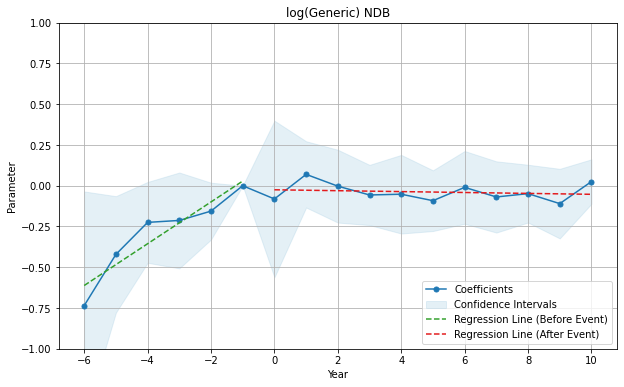

In [5]:
# generic data
formula="log_quantity~elapsed_m6+elapsed_m5+elapsed_m4+elapsed_m3+elapsed_m2+elapsed_0+elapsed_1+elapsed_2+elapsed_3+elapsed_4+elapsed_5+elapsed_6+elapsed_7+elapsed_8+elapsed_9+elapsed_10+TimeEffects+EntityEffects"

# till elapsed_20
# formula="log_quantity~ elapsed_m6+elapsed_m5+elapsed_m4+elapsed_m3+elapsed_m2+elapsed_0+elapsed_1+elapsed_2+elapsed_3+elapsed_4+elapsed_5+elapsed_6+elapsed_7+elapsed_8+elapsed_9+elapsed_10+elapsed_11+elapsed_12+elapsed_13+elapsed_14+elapsed_15+TimeEffects+EntityEffects"

# add generic_per
# formula+="+log(generic_per)"
# generic_share_r
# formula+=" + generic_share_r"
# generic_share_q
# formula+="+log(薬価)"
# formula+=" + log(generic_share_q)"
# formula+="+log(price)"
formula+="+1"
mod_fe=PanelOLS.from_formula(formula, data=df_generic,check_rank=False,drop_absorbed=True)
res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
print(res_fe.summary.tables[1])
# print(res_fe.summary.tables[0])
# print(res_fe)
# plot_result(res_fe,file_name="ndb_generic",title="generic ndb",start_from=1,period=15)
plot_result(res_fe,file_name="ndb_generic_con",title="log(Generic) NDB",start_from=1,)

                          PanelOLS Estimation Summary                           
Dep. Variable:           log_quantity   R-squared:                        0.1920
Estimator:                   PanelOLS   R-squared (Between):             -0.0412
No. Observations:                 212   R-squared (Within):              -0.1741
Date:                Mon, Jan 22 2024   R-squared (Overall):             -0.0411
Time:                        17:30:42   Log-likelihood                    142.00
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      2.3621
Entities:                          31   P-value                           0.0035
Avg Obs:                       6.8387   Distribution:                  F(16,159)
Min Obs:                       3.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             4.9711
                            

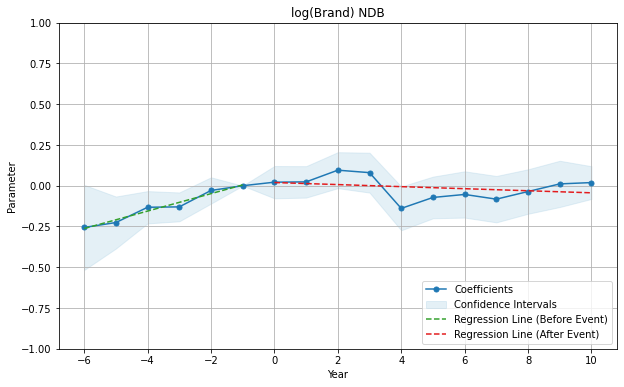

In [6]:
# branded data
formula="log_quantity~ elapsed_m6+elapsed_m5+elapsed_m4+elapsed_m3+elapsed_m2+elapsed_0+elapsed_1+elapsed_2+elapsed_3+elapsed_4+elapsed_5+elapsed_6+elapsed_7+elapsed_8+elapsed_9+elapsed_10+TimeEffects+EntityEffects"

# till elapsed_20
# formula="log_quantity~ elapsed_m6+elapsed_m5+elapsed_m4+elapsed_m3+elapsed_m2+elapsed_0+elapsed_1+elapsed_2+elapsed_3+elapsed_4+elapsed_5+elapsed_6+elapsed_7+elapsed_8+elapsed_9+elapsed_10+elapsed_11+elapsed_12+elapsed_13+elapsed_14+elapsed_15+TimeEffects+EntityEffects"
# add generic_per
# formula+="+log(generic_per)"
# formula+="+generic_per"
# generic_share_r
# formula+=" + generic_share_r"
# formula+="+elapsed_m1"
formula+="+1"
# generic_share_q
# formula+=" + log(generic_share_q)"
# formula+=" + log(薬価)"
# formula+="+log(price)"

mod_fe=PanelOLS.from_formula(formula, data=df_branded,check_rank=False,drop_absorbed=True)
res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
# print(res_fe.summary.tables[1])
# print(res_fe.summary.tables[0])
print(res_fe)
# plot_result(res_fe,file_name="ndb_brand",title="brand ndb",start_from=1,period=15)
plot_result(res_fe,file_name="ndb_brand_con",title="log(Brand) NDB")
